<a href="https://colab.research.google.com/github/matvid/Proyecto_Predicciones_ventas/blob/main/Proyecto_Predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO**

Predicción de ventas para productos alimenticios vendidos en diversas tiendas. El objetivo de este es ayudar a un comerciante a comprender tanto las propiedades de los productos así como los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

**Actividad - Parte 1**

*   **Carga de datos**

In [140]:
#Montar Drive
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
#Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import set_config
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
set_config(display="diagram")

In [142]:
#Cargar dataframe
filename = ("/content/drive/MyDrive/Bootcamp/Coding Dojo/Proyecto 1/Datas/sales_predictions_2023.csv")
df = pd.read_csv(filename)

*   **Diccionario de datos**

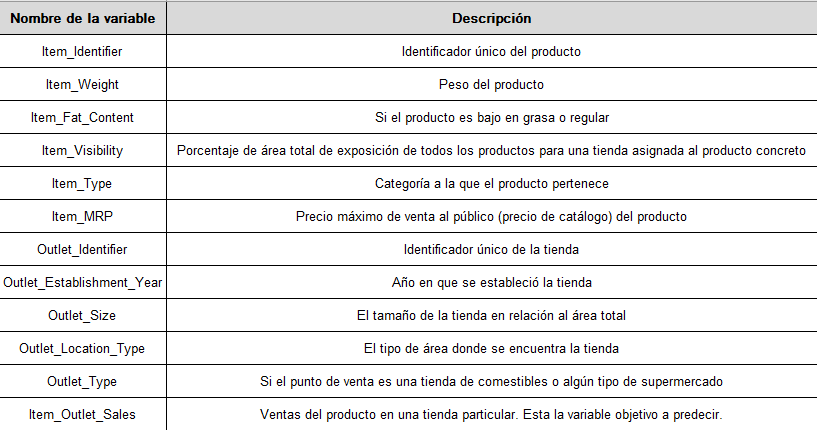

*   **Revisión de datos**

In [143]:
#Visualizar encabezado del dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [144]:
#Visualizar cola del dataframe
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


**Actividad - Parte 2**

**1)¿Cuántas filas y columnas hay?**

In [145]:
#Identificar estructura del dataframe
df.shape
print(f"El dataframe consta con",df.shape[0],"filas y",df.shape[1],"columnas.")

El dataframe consta con 8523 filas y 12 columnas.


**2) ¿Cuáles son los tipos de datos de cada variable?**

In [146]:
#Visualizar tipo de variables del dataframe
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3) ¿Hay duplicados? Si es el caso, elimínelos.**

In [147]:
#Revisar presencia de duplicados en el dataframe
df.duplicated().sum()

0

No existen duplicados en el dataframe.

**4) Identifique los valores faltantes.**

In [148]:
#Revisar presencia de valores faltantes en el dataframe
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Existen dos columnas que cuentan con valores faltantes. Estas son, "Item_Weight" y "Outlet_Size".

**5) Decida qué hacer con los valores faltantes y cómo hacerlo. (Esto requiere de su criterio, así que explique cada elección).**

*   **Columna "Item_Weight"**

In [149]:
#Análisis: Filtrar columnas por datos faltantes en "Item_Weight"
item_weight_faltantes = df["Item_Weight"].isna()
df.loc[item_weight_faltantes,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Al visualizar los datos de la columna "Item_Weight", y para definir cómo tratar esta columna se analiza lo siguiente:

Relación directa: al analizar sólo esta columna, no existe información que permita identificar el valor de los datos faltantes.
Correlación: existe correlación con la columna "Item_Identifier".

Por lo anterior, se deberá reemplazar el dato faltante por el peso del producto según la columna "Item_Identifier". Esto debido a que el peso del producto es único.

In [150]:
#Identificar el peso de cada producto
df.groupby("Item_Identifier")["Item_Weight"].max()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

Debido a que el peso es único para el producto, se decide identificar el peso con el valor máximo del Item_Identifier. (Se podría usar la moda, el mínimo, o bien, el máximo)

In [151]:
#Reemplazar valores faltantes por el valor máximo para el grupo correspondiente
df["Item_Weight"] = df.groupby("Item_Identifier")["Item_Weight"].apply(lambda x: x.fillna(x.max()))

<ipython-input-151-4ba2882feace>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["Item_Weight"] = df.groupby("Item_Identifier")["Item_Weight"].apply(lambda x: x.fillna(x.max()))


*   **Columna "Outlet_Size"**

In [152]:
#Análisis: Filtrar columnas por datos faltantes en "Outlet_Size"
outlet_size_faltantes = df["Outlet_Size"].isna()
df.loc[outlet_size_faltantes,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [153]:
#Revisar qué valores de la columna "Outlet_Size"
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

Al visualizar los datos de la columna "Outlet_Size", y para definir cómo tratar esta columna se analiza lo siguiente:
1.   Relación directa: al analizar sólo esta columna, no existe información que permita identificar el valor de los datos faltantes.
2. Correlación: no existe relación con el resto de las columnas.
3. Métodos estadísticos: no aplica una revisión estadística en esta columna.
4. Eliminar datos: debido a que los datos faltantes corresponden a un 28,3% del total de la columna, y que eliminar estos datos puede alterar y entregar información errónea de la muestra del dataframe, se decide no eliminar esta información.

Por lo anterior, y si bien corresponde consultar y/o recabar más información del dataframe con el equipo técnico de la empresa, se decide mantener los datos faltantes debido a su magnitud en el dataframe e incorporar una variable denominada "Sin información".

In [154]:
#Reemplazar datos faltantes por "Sin información"
df["Outlet_Size"].fillna("Sin información", inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Sin información,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Sin información,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**6) Confirme que no hay valores faltantes después de tratarlos.**

In [155]:
#Revisar nuevamente la presencia de datos faltantes en el dataframe
df.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Aún continúan existiendo 4 datos faltantes en la columna "Item_Weight".

In [156]:
#Revisar los 4 datos que aún continúan en blanco en la columna "Item_Weight"
item_weight_faltantes_nuevo = df["Item_Weight"].isna()
df.loc[item_weight_faltantes_nuevo,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [157]:
#Revisar si existe otro producto FDN52 en el dataframe
producto_FDN52 = df[df["Item_Identifier"] == "FDN52"]
producto_FDN52

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [158]:
#Revisar si existe otro producto FDK57 en el dataframe
producto_FDK57 = df[df["Item_Identifier"] == "FDK57"]
producto_FDK57

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [159]:
#Revisar si existe otro producto FDE52 en el dataframe
producto_FDE52 = df[df["Item_Identifier"] == "FDE52"]
producto_FDE52

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046


In [160]:
#Revisar si existe otro producto FDQ60 en el dataframe
producto_FDQ60 = df[df["Item_Identifier"] == "FDQ60"]
producto_FDQ60

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Según los filtros revisados anteriormente, estos productos sólo aparecen una vez en el dataframe, por lo que no existe el peso de estos productos.
En vista de estos antecedentes, y además, ya que no existe una nueva correlación con otras columnas, y que estos cuatro datos corresponden a un 0.05% del total de la columna, se procederán a eliminar.

In [161]:
#Eliminar filas vacias de la columna "Item_Weight"
df.dropna(subset=["Item_Weight"], inplace=True)

In [162]:
#Revisar nuevamente la presencia de datos faltantes en el dataframe
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7) Encuentre y arregle cualquier categoría inconsistente en los datos (ejemplo: arreglar los datos gato, Gato y Gatos de manera que sean consistentes)**

*   **Columnas numéricas**

In [163]:
#Revisar inconsistencias en columnas numéricas
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


No se identifican inconsistencias en las columnas numéricas.

*   **Columna "Item_Identifier"**

In [164]:
#Revisar inconsistencias en columnas no numéricas - Item_Identifier
df["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
         ..
DRF48     1
FDY43     1
FDC23     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1555, dtype: int64

No se identifican inconsistencias en la columna "Item_identifier".

*   **Columna "Item_Fat_Content**

In [165]:
#Revisar inconsistencias en columnas no numéricas - Item_Fat_Content
df["Item_Fat_Content"].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Se identifican inconsistencias en la asignación de las variables "LF", "reg" y "low fat". Se debe proceder a reemplazar por "Low Fat" y "Regular" según corresponda".

In [166]:
#Reemplazar valores inconsistentes
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"Low Fat":"Low", "LF":"Low", "low fat":"Low", "reg":"Regular"})
df["Item_Fat_Content"].value_counts()

Low        5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

*   **Columna "Item_Type"**

In [167]:
#Revisar inconsistencias en columnas no numéricas - Item_Type
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

No se identifican inconsistencias en la columna "Item_Type".

*   **Columna "Outlet_Identifier"**

In [168]:
#Revisar inconsistencias en columnas no numéricas - Outlet_Identifier
df["Outlet_Identifier"].value_counts()

OUT013    932
OUT027    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: Outlet_Identifier, dtype: int64

No se identifican inconsistencias en la columna "Outlet_Identifier".

*   **Columna "Outlet_Size"**

In [169]:
#Revisar inconsistencias en columnas no numéricas - Outlet_Size
df["Outlet_Size"].value_counts()

Medium             2790
Sin información    2410
Small              2387
High                932
Name: Outlet_Size, dtype: int64

No se identifican inconsistencias en la columna "Outlet_Size".

*   **Columna "Outlet_Location_Type"**

In [170]:
#Revisar inconsistencias en columnas no numéricas - Outlet_Location_Type
df["Outlet_Location_Type"].value_counts()

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

No se identifican inconsistencias en la columna "Outlet_Location_Type".

*   **Columna "Outlet_Type"**

In [171]:
#Revisar inconsistencias en columnas no numéricas - Outlet_Type
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

No se identifican inconsistencias en la columna "Outlet_Type".

**8) Para cualquier columna numérica, obtenga las estadísticas resumidas de cada una (mínimo, máximo y media)**

In [172]:
#Crear variable que contenga sólo columnas numéricas del df
columnas_numericas = df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]]
columnas_numericas

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [173]:
#Obtener datos estadísticos (mínimo, máximo y media) de las columnas mencionadas anteriormente
columnas_numericas.describe().round(2).loc[["min","max","mean"]]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,12.88,0.07,141.01,1997.84,2181.19


**Actividad - Parte 3**

*   **Histograma para ver las distribuciones de las diversas características en el conjunto de datos.**

<ipython-input-174-0ea1e5fc3622>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


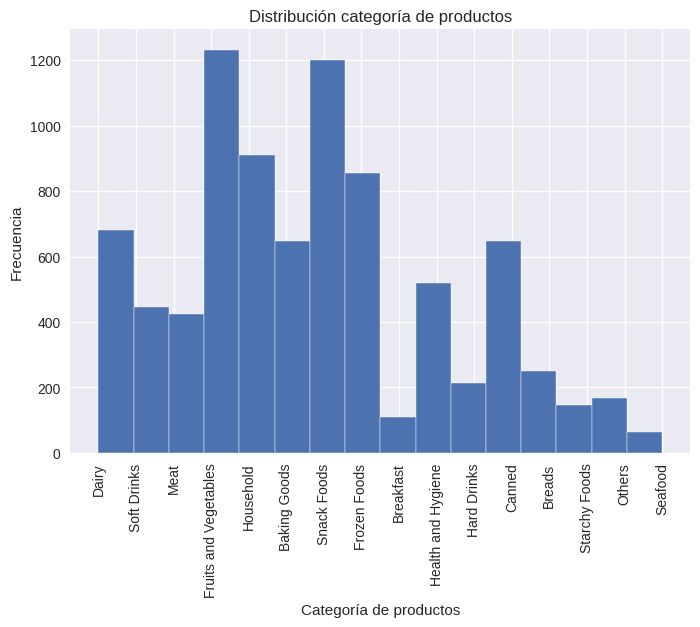

In [174]:
plt.style.use("seaborn")
df["Item_Type"].hist(bins=16)
plt.xticks(rotation = 90)
plt.title("Distribución categoría de productos")
plt.ylabel("Frecuencia")
plt.xlabel("Categoría de productos")
plt.show()

Las frecuencias más alta se presenta en las categorías de frutas y vegetales, snack y comida casera.
Las frecuencias más bajas se presentan en las categorías en alimentos ricos en almidón, desayuno y los mariscos.

*   **Boxplot para ver resúmenes estadísticos de diversas características del conjunto de datos.**

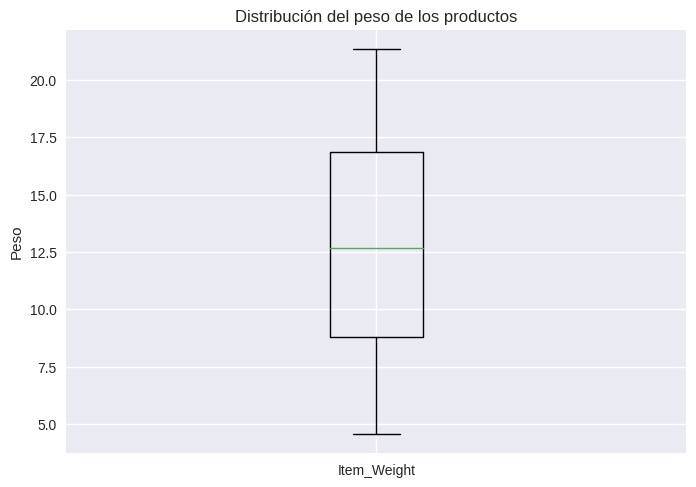

In [175]:
plt.boxplot([df["Item_Weight"]], labels=["Item_Weight"])
plt.title("Distribución del peso de los productos")
plt.ylabel("Peso")
plt.xlabel("")
plt.show()

El gráfico nos entrega la siguiente información:

*   La media se encuentra en los 12.5.
*   El valor mínimo está cercano a los 9.0.
*   El valor máximo está cercano a los 17.5.
*   No existen valores outliers en el gráfico. Esto quiere decir que todos los valores están dentro del rango intercuantil.
*   Existe simetría entre la media y el rango intercuantil de la muestra.

*   **Mapa de calor de correlación entre las características.**

<ipython-input-176-712454657982>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

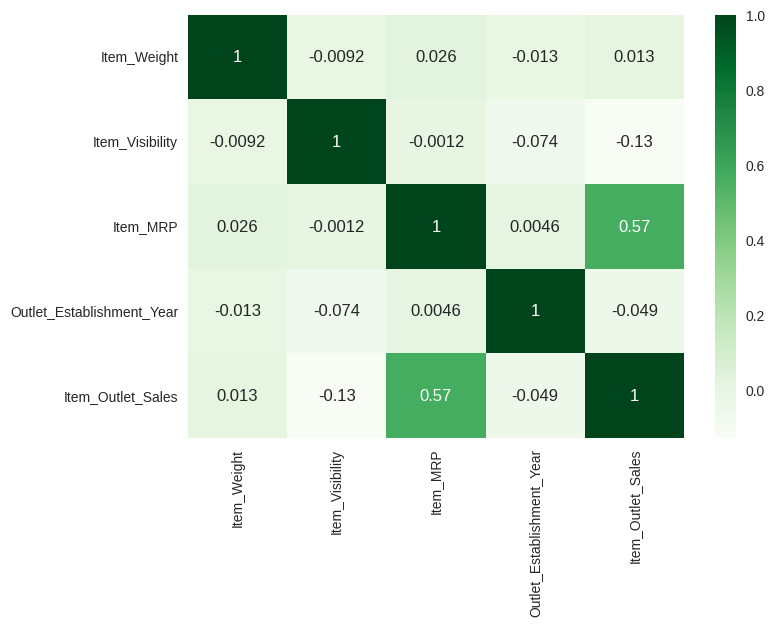

In [176]:
corr = df.corr()
sns.heatmap(corr, cmap = "Greens", annot = True)

*   Existe una moderada relación entre la columna "Item_Outlet_Sales" y la columna "Item_MRP" con un coeficiente de 0.57.
*   No se logra identificar ninguna relación entre las variables del resto de las colmnas del dataframe. Lo anterior, se confirma debido a que los valores del coeficiente se encuentran bajo 0.3 de magnitud.

**Actividad - Parte 4**

Creen un mínimo de **dos visualizaciones de datos** para ayudar a otros a comprender las tendencias en los datos (análisis de datos explicativos).

- Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.

In [177]:
#Definir la media del precio para cada categoría de productos
media_grafico = df.groupby("Item_Type")["Item_MRP"].mean().round(2)

In [178]:
#Crear un nuevo dataframe que contenga media del precio para cada categoría de productos
media_grafico_df = pd.DataFrame(media_grafico).reset_index()
media_grafico_df

,Item_Type,Item_MRP
0,Baking Goods,126.39
1,Breads,140.95
2,Breakfast,141.79
3,Canned,139.76
4,Dairy,148.59
5,Frozen Foods,138.56
6,Fruits and Vegetables,144.58
7,Hard Drinks,137.08
8,Health and Hygiene,130.82
9,Household,149.42


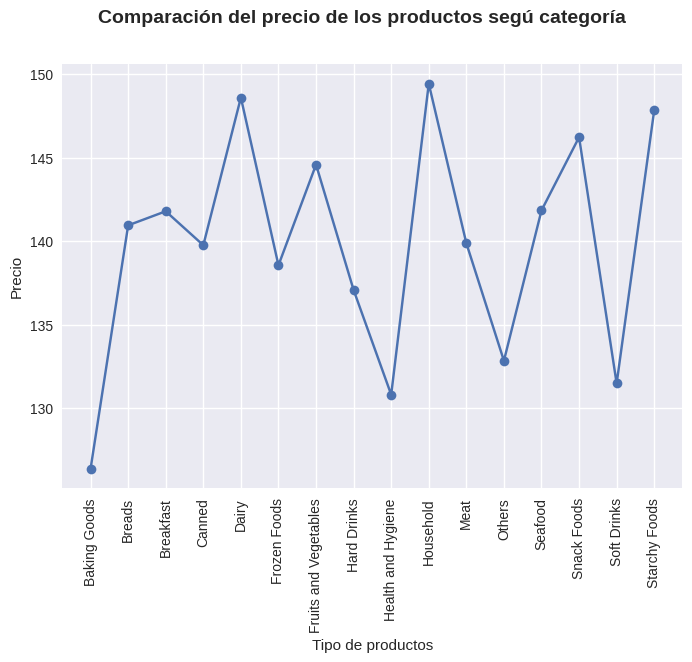

In [179]:
#Crear gráfico
figura = plt.figure(dpi=100)
figura.suptitle("Comparación del precio de los productos segú categoría", fontsize=14, fontweight="bold")
ax = figura.add_subplot(1, 1, 1)
plt.plot(media_grafico_df["Item_Type"], media_grafico_df["Item_MRP"],"bo-")
plt.xlabel("Tipo de productos")
plt.xticks(rotation=90)
plt.ylabel("Precio")
plt.show()

En el gráfico se evidencia claramente la variación de precios entre las distintas categorías de productos. Observando la altura de las barras, podemos inferir que las categorías relacionadas con productos para hornear, productos de salud e higiene, así como las bebidas sin alcohol, tienden a tener precios más bajos en comparación con otras categorías.

Por el contrario, las categorías que exhiben barras más altas, indicando mayores alturas en el gráfico, son la comida casera, lácteos y productos ricos en almidón. Esto sugiere que estos grupos de productos tienden a tener precios más elevados en promedio.

En resumen, la visualización destaca claramente las diferencias de precios entre las diversas categorías de productos en tu conjunto de datos. Las categorías mencionadas anteriormente se destacan como las que, en promedio, tienen los precios más bajos y más altos, respectivamente.

In [180]:
#Definir la media del total de ventas para el punto de venta según tipo de área
media_ventas = df.groupby(["Outlet_Location_Type", "Outlet_Type"])["Item_Outlet_Sales"].mean().round(2).reset_index()
media_ventas

,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Tier 1,Grocery Store,340.75
1,Tier 1,Supermarket Type1,2313.10
2,Tier 2,Supermarket Type1,2323.99
3,Tier 3,Grocery Store,339.35
4,Tier 3,Supermarket Type1,2299.00
5,Tier 3,Supermarket Type2,1995.50
6,Tier 3,Supermarket Type3,3695.78


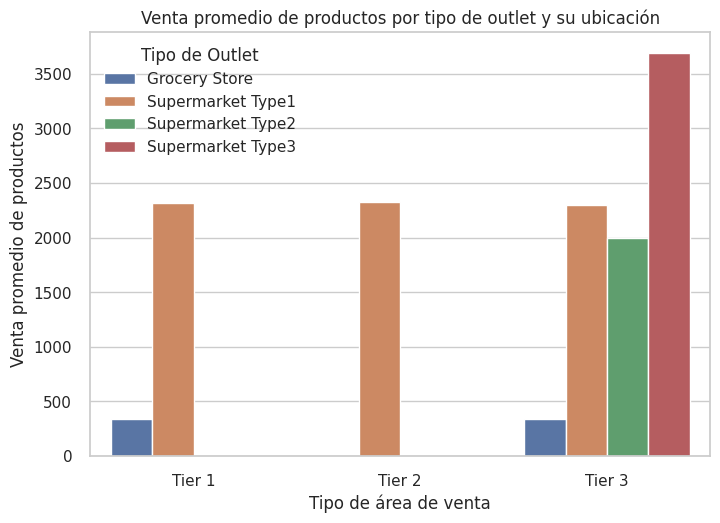

In [181]:
sns.set(style="whitegrid")
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", hue="Outlet_Type", data=media_ventas)
plt.xlabel("Tipo de área de venta")
plt.ylabel("Venta promedio de productos")
plt.title("Venta promedio de productos por tipo de outlet y su ubicación")
plt.legend(title="Tipo de Outlet", loc="upper left")
plt.show()

En el gráfico, se representan los tres tipos de áreas de ventas, revelando patrones distintivos entre ellos:

* Tiendas de Comestibles:

Las ventas en las tiendas de comestibles muestran similitudes notables únicamente en los niveles 1 y 3. Entre los tipos de área, las tiendas de comestibles son las que registran las ventas más bajas en comparación con los otros establecimientos.

* Supermercados Tipo 1:

Se observan valores de ventas de productos bastante uniformes en los tres tipos de áreas. Esto sugiere una consistencia en el rendimiento de ventas independientemente del nivel de área.

* Supermercado Tipo 2:

Este tipo de supermercado solo se identifica en el nivel 3. Aunque las ventas son notables, son inferiores a las del supermercado tipo 1 en el mismo nivel.

* Supermercado Tipo 3:

Se distingue únicamente en el nivel 3, destacando significativamente con un valor de ventas considerablemente superior al de otras tiendas.

Esta interpretación resalta las tendencias específicas en las ventas de productos para cada de tienda según el tipo de área.

**Actividad - Parte 5**

**Identifiquen las características (X) y el objetivo (y): Asignen la columna "Item_Outlet_Sales" como el objetivo y el resto de las variables relevantes como la matriz de características.**

In [182]:
#Definir las características (X) y el objetivo (y)
y = df["Item_Outlet_Sales"]
X = df.drop(columns=["Item_Outlet_Sales","Item_Identifier"])

**Realicen un train test split.**

In [183]:
#Realizar train test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.8, test_size=0.2, random_state=42)

In [184]:
#Revisar estructura del objetivo (y) - train
y_train.shape

(6815,)

In [185]:
#Revisar estructura del objetivo (y) - test
y_test.shape

(1704,)

In [186]:
#Revisar estructura de las características (X) - train
X_train.shape

(6815, 10)

In [187]:
#Revisar estructura de las características (X) - test
X_test.shape

(1704, 10)

**Nota: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.**

In [188]:
#Instanciar selector de columnas tipo "object"
cat_selector = make_column_selector (dtype_include="object")

In [189]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [190]:
#Instanciar selector de columnas tipo "numérica"
num_selector = make_column_selector (dtype_include="number")

In [191]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [192]:
#Crear un objeto StandarScaler
standard_scaler = StandardScaler()

In [193]:
#Crear un objeto OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [194]:
#Imputar "mean" en los valores faltantes de las columnas numéricas
imputer_num = SimpleImputer(strategy="mean")

In [195]:
#Imputar "most_frequent" en los valores faltantes de las columnas categóricas
imputer_cat = SimpleImputer(strategy="most_frequent")

**Creen un pipeline de preprocesamiento para preparar el conjunto de datos para aprendizaje automático.**

In [196]:
#Crear pipeline que asocie el Imputer y el OneHotEncoder
cat_pipeline = make_pipeline(imputer_cat, one_hot_encoder)
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [197]:
#Crear pipeline que asocie el Imputer y el StandardScaler
num_pipeline = make_pipeline(imputer_num, standard_scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [198]:
#Crear tupla numérica que asocie las columnas numéricas con el pipeline correspondiente
num_tuple = (num_pipeline, num_selector)

In [199]:
#Crear tupla numérica que asocie las columnas categóricas con el pipeline correspondiente
cat_tuple = (cat_pipeline, cat_selector)

In [200]:
#Aplicar preprocesamiento
preprocesamiento = make_column_transformer(num_tuple, cat_tuple)

In [201]:
#Entrenar preprocesamiento
preprocesamiento.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ad2e2c0edd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ad2e2d3dde0>)])

In [202]:
#Transformar preprocesamiento - X_train
X_train_processed = preprocesamiento.transform(X_train)

In [203]:
#Transformar preprocesamiento - X_test
X_test_processed = preprocesamiento.transform(X_test)

In [204]:
#Visualizar resultados de X_train
X_train_processed

array([[-1.09041647,  0.2749748 , -1.21572566, ...,  1.        ,
         0.        ,  0.        ],
       [-0.73056684, -0.59358475,  0.48391593, ...,  1.        ,
         0.        ,  0.        ],
       [-0.30089563, -0.87103074, -0.16468241, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.56817413,  1.08941516, -0.74399771, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.60039947, -0.21890082, -0.37017708, ...,  1.        ,
         0.        ,  0.        ],
       [-1.07322963, -1.28216804, -0.51127032, ...,  1.        ,
         0.        ,  0.        ]])

In [205]:
#Visualizar resultados de X_test
X_test_processed

array([[ 1.20295361, -0.61837719, -0.13694425, ...,  1.        ,
         0.        ,  0.        ],
       [-1.31921639, -0.71299339, -0.96599261, ...,  0.        ,
         1.        ,  0.        ],
       [-0.55869835, -0.91792229, -0.8515019 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.31037141,  1.22311699, -0.54427077, ...,  1.        ,
         0.        ,  0.        ],
       [-0.38682987,  0.76728411,  0.14949366, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40831343,  0.79630093, -0.28607647, ...,  0.        ,
         1.        ,  0.        ]])

**Actividad - Parte 6**

**1) La primera tarea será crear un modelo de regresión lineal para predecir las ventas.**

**Creen un modelo de regresión lineal.**

In [206]:
#Instanciar el modelo de regresión lineal
reg = LinearRegression()

In [207]:
#Entrenar modelo del conjunto de entrenamiento
reg.fit(X_train_processed,y_train)

LinearRegression()

**Evalúen el rendimiento del modelo basándose en r^2.**

In [208]:
#Obtener datos del R^2 - Conjunto de entrenamiento
train_score = reg.score(X_train_processed,y_train)
train_score.round(2)

0.56

In [209]:
#Obtener datos del R^2 - Conjunto de prueba
test_score = reg.score(X_test_processed,y_test)
test_score.round(2)

0.57

**Evalúen el rendimiento del modelo basándose en RECM.**

In [210]:
#Guardar como variable predicciones del modelo - train
train_preds = reg.predict(X_train_processed)

In [211]:
#Guardar como variable predicciones del modelo - test
test_preds = reg.predict(X_test_processed)

In [212]:
#Obtener Raíz del Error Cuadrático Medio (RECM) - train
rmse_train = np.sqrt(mean_squared_error(y_train,train_preds))
rmse_train.round(2)

1125.54

In [213]:
#Obtener Raíz del Error Cuadrático Medio (RECM) - test
rmse_test = np.sqrt(mean_squared_error(y_test,test_preds))
rmse_test.round(2)

1135.44

**2) La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.**

- **Creen un modelo simple de árbol de regresión.**

In [214]:
#Instanciar modelo de árbol de regresión
dec_tree = DecisionTreeRegressor(random_state=42)

In [216]:
#Ajustar modelo de árbol de regresión
dec_tree.fit(X_train_processed,y_train)

DecisionTreeRegressor(random_state=42)

In [219]:
#Predecir valores objetivos para train y test
train_preds_dec = dec_tree.predict(X_train_processed)
test_preds_dec = dec_tree.predict(X_test_processed)

- **Comparen el rendimiento del modelo basándose en r^2.**

In [220]:
#Evaluar modelo de árbol de regresión - train
train_score_dec = dec_tree.score(X_train_processed,y_train)
train_score_dec.round(3)

1.0

In [234]:
#Evaluar modelo de árbol de regresión - test
test_score_dec = dec_tree.score(X_test_processed,y_test)
test_score_dec.round(2)

0.18

Para el conjunto de prueba, el rendimient del modelo de regresión lineal es 0.57, en cambio, el modelo de árbol de regresión presenta un rendimiento más bajo según el puntaje de 0.18.

- **Comparen el rendimiento del modelo basándose en RECM.**

In [231]:
#Obtener Raíz del Error Cuadrático Medio (RECM) - train
rmse_train_dec = np.sqrt(mean_squared_error(y_train,train_preds_dec))
rmse_train_dec

6.7465676141193014e-15

In [233]:
#Obtener Raíz del Error Cuadrático Medio (RECM) - test
rmse_test_dec = np.sqrt(mean_squared_error(y_test,test_preds_dec))
rmse_test_dec.round(2)

1557.94

Para el conjunto de prueba, el rendimient del modelo de regresión lineal es 1135.44, en cambio, el modelo de árbol de regresión presenta un rendimiento más bajo según el puntaje de 1557.94.

**3) Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.**

- **En general, ¿qué modelo recomiendan?**

Se recomienda trabajar con el modelo de regresión lineal.

- **Justifiquen su recomendación.**

El modelo de regresión lineal muestra un rendimiento en train y en test muy similar, lo que indica un ajuste similar para ambos conjuntos. En cambio, el modelo de árbol de regresión muestra un rendimiento perfecto en train pero muy bajo en test, esto sugiere un posible sobreajuste en este último conjunto.

Se prefiere el modelo de regresión lineal debido a su ajuste robusto y generalización equilibrada en ambos conjuntos de entrenamiento y prueba, en comparación con el modelo de árbol de regresión.